## Necessary Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

## Reading data

In [69]:
train_data = pd.read_csv(r'D:\Data_Science\Data_File\Hackathon\train.csv')
test_data = pd.read_csv(r'D:\Data_Science\Data_File\Hackathon\test.csv')

## EDA

In [6]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_data.shape, test_data.shape

((381109, 12), (127037, 11))

In [9]:
print('total record: ',(381109+127037)), print('train record %: ',(381109/(381109+127037)*100)), print('test record %: ',(127037/(381109+127037)*100))

total record:  508146
train record %:  74.99990160308258
test record %:  25.00009839691742


(None, None, None)

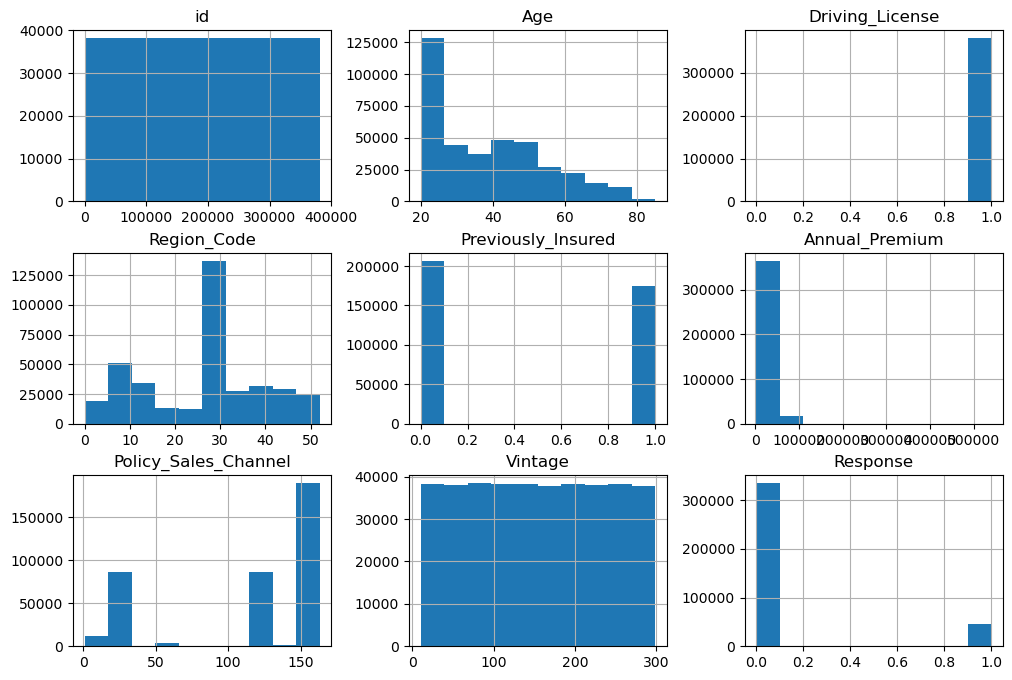

In [10]:
# Feature Distributions
train_data.hist(figsize=(12, 8))
plt.show()

Response
0    334399
1     46710
Name: count, dtype: int64


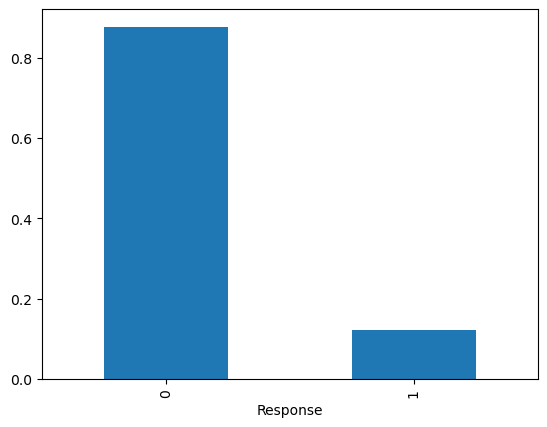

In [11]:
train_data['Response'].value_counts(normalize=True).plot(kind='bar')
print(train_data['Response'].value_counts())

In [12]:
334399+46710  # Total records

381109

In [13]:
(334399/381109*100), (46710/381109*100)   

(87.74366388618479, 12.256336113815209)

In [14]:
train_data['Response'].value_counts(normalize=True)      # Highly immbalanced data

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [15]:
train_data['Response'].isna().sum()

0

In [16]:
train_data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [17]:
train_data[:10].transpose()

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
Gender,Male,Male,Male,Male,Female,Female,Male,Female,Female,Female
Age,44,76,47,21,29,24,23,56,24,32
Driving_License,1,1,1,1,1,1,1,1,1,1
Region_Code,28.0,3.0,28.0,11.0,41.0,33.0,11.0,28.0,3.0,6.0
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year,< 1 Year,< 1 Year,1-2 Year,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No,Yes,Yes,Yes,No,No
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0,2630.0,23367.0,32031.0,27619.0,28771.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0,160.0,152.0,26.0,152.0,152.0


In [18]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [20]:
train_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [21]:
for col_name in train_data.columns:
    if train_data[col_name].dtypes == 'object':
        unique_cat = len(train_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Gender' has 2 unique categories
Feature 'Vehicle_Age' has 3 unique categories
Feature 'Vehicle_Damage' has 2 unique categories


In [22]:
train_data['Gender'].value_counts()   # only 2 vlaues

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [23]:
train_data['Vehicle_Age'].value_counts()  # only 3 vlaues

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [24]:
train_data['Vehicle_Damage'].value_counts()    # only 2 vlaues

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [25]:
#Unique values count of each row 
for i in train_data.columns:
    print('--------------------------')
    print(train_data[i].value_counts())
    print('--------------------------\n')

--------------------------
id
1         1
254071    1
254080    1
254079    1
254078    1
         ..
127035    1
127034    1
127033    1
127032    1
381109    1
Name: count, Length: 381109, dtype: int64
--------------------------

--------------------------
Gender
Male      206089
Female    175020
Name: count, dtype: int64
--------------------------

--------------------------
Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64
--------------------------

--------------------------
Driving_License
1    380297
0       812
Name: count, dtype: int64
--------------------------

--------------------------
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18

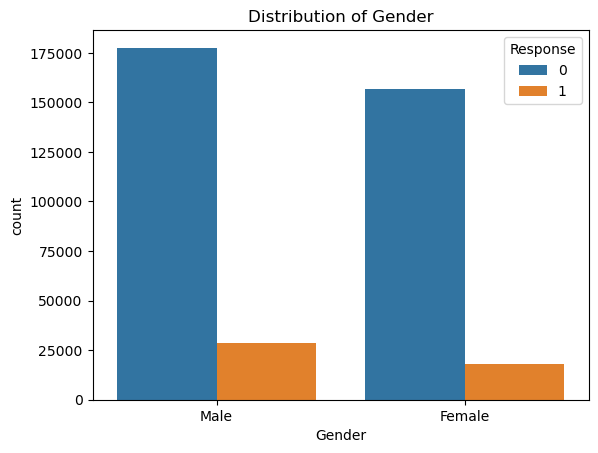

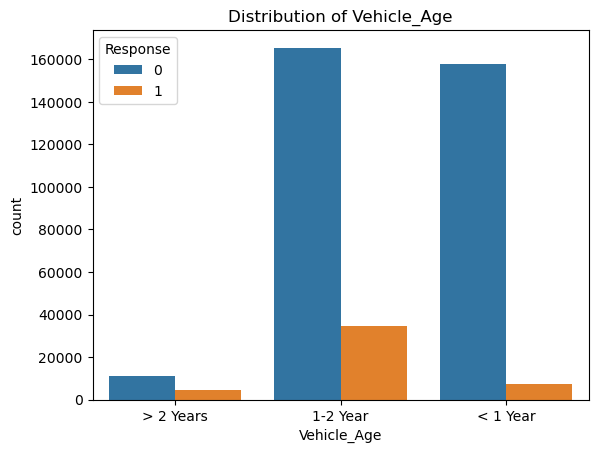

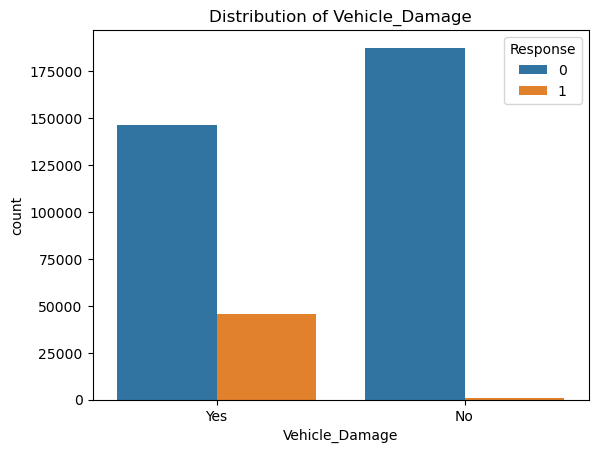

In [26]:
# Categorical Feature Analysis
categorical_cols = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
for col in categorical_cols:
    sns.countplot(x=train_data[col], hue=train_data['Response'])
    plt.title(f"Distribution of {col}")
    plt.show()

In [27]:
train_data_cate = train_data.select_dtypes(include = 'object' ).columns   # Getting categorical columns
train_data_num = train_data.select_dtypes(exclude = 'object' ).columns    # Getting numerical columns

In [28]:
print(train_data.head().transpose())
print('-----------')
print(train_data_cate)
print('-----------')
print(train_data_num)

                              0         1          2         3         4
id                            1         2          3         4         5
Gender                     Male      Male       Male      Male    Female
Age                          44        76         47        21        29
Driving_License               1         1          1         1         1
Region_Code                28.0       3.0       28.0      11.0      41.0
Previously_Insured            0         0          0         1         1
Vehicle_Age           > 2 Years  1-2 Year  > 2 Years  < 1 Year  < 1 Year
Vehicle_Damage              Yes        No        Yes        No        No
Annual_Premium          40454.0   33536.0    38294.0   28619.0   27496.0
Policy_Sales_Channel       26.0      26.0       26.0     152.0     152.0
Vintage                     217       183         27       203        39
Response                      1         0          1         0         0
-----------
Index(['Gender', 'Vehicle_Age', 'Vehicl

In [29]:
for col_name in train_data.columns:
    if train_data[col_name].dtypes:
        unique_cat = len(train_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique values".format(col_name=col_name, unique_cat=unique_cat))

Feature 'id' has 381109 unique values
Feature 'Gender' has 2 unique values
Feature 'Age' has 66 unique values
Feature 'Driving_License' has 2 unique values
Feature 'Region_Code' has 53 unique values
Feature 'Previously_Insured' has 2 unique values
Feature 'Vehicle_Age' has 3 unique values
Feature 'Vehicle_Damage' has 2 unique values
Feature 'Annual_Premium' has 48838 unique values
Feature 'Policy_Sales_Channel' has 155 unique values
Feature 'Vintage' has 290 unique values
Feature 'Response' has 2 unique values


<Axes: xlabel='Age', ylabel='Count'>

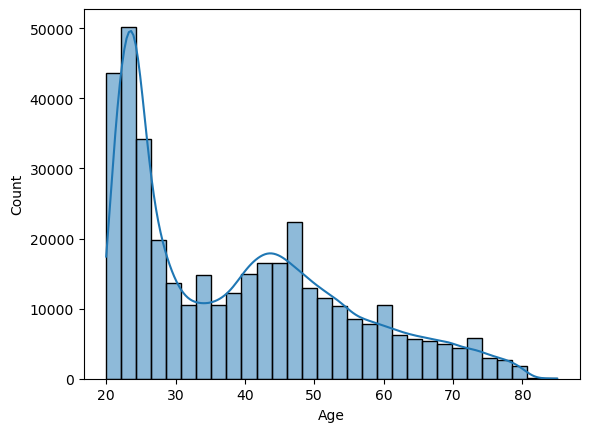

In [30]:
# r = train_data['Age'].value_counts().sort_index()
# r.plot(kind='bar')
# plt.show()
sns.histplot(x=train_data['Age'], bins=30, kde=True)

## Data Preprocessing

In [32]:
# label_encoders = {}

# for col in train_data_cate:    # ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
#     le = LabelEncoder()
#     train_data[col] = le.fit_transform(train_data[col])


In [5]:
repl = {'Gender': {'Male':1 ,'Female':0},
        'Vehicle_Damage': {'Yes':1 ,'No':0}}

train_data.replace(repl , inplace=True)

In [34]:
train_data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [35]:
train_data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
train_data = pd.get_dummies(train_data, columns=["Vehicle_Age"], dtype= 'int')

In [37]:
train_data.select_dtypes(include = 'object' ).columns

Index([], dtype='object')

In [9]:
# Scale numerical features
scaler = StandardScaler()
train_data["Annual_Premium"] = scaler.fit_transform(train_data[["Annual_Premium"]])

In [11]:
train_data[:2]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,1,0.574539,26.0,217,1,0,0,1
1,2,1,76,1,3.0,0,0,0.172636,26.0,183,0,1,0,0


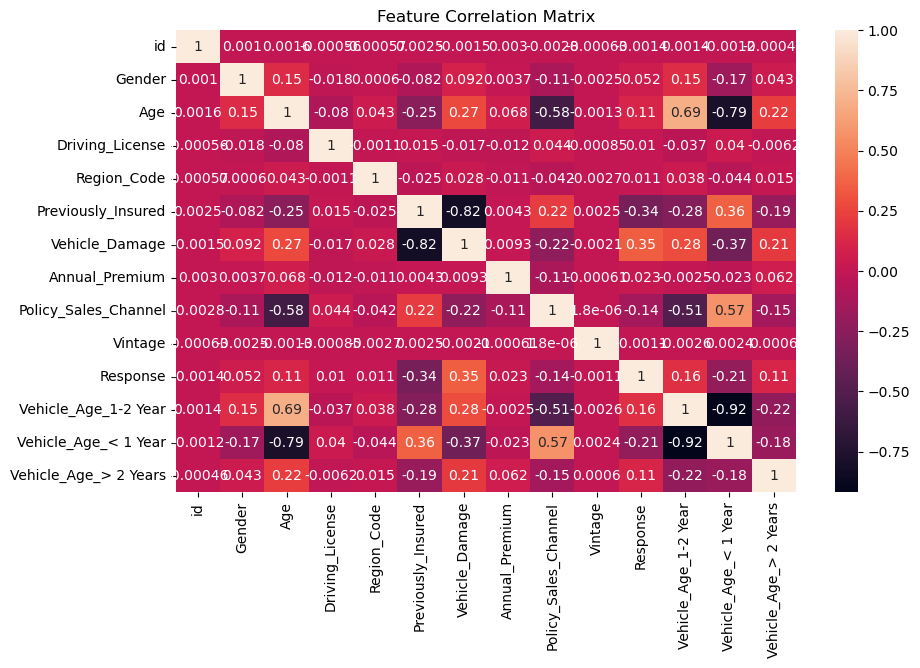

In [40]:
# Correlation Heatmap
# After conveerting all columns to int/float/binary
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot = True)
plt.title("Feature Correlation Matrix")
plt.show()


## Spliting Data

In [13]:
# Splitting data into train and validation sets
X = train_data.drop(columns=["id", "Response"])
y = train_data["Response"]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state= 42)

In [17]:
X_train.shape , X_test.shape, y_train.shape  , y_test.shape

((304887, 12), (76222, 12), (304887,), (76222,))

## UnderSampling

In [50]:
train_data['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [20]:
# Sample imbalanced dataset (X: Features, y: Target)
print("Before Undersampling:", Counter(y_train))

Before Undersampling: Counter({0: 267700, 1: 37187})


In [22]:
267700/(267700+37187)*100

87.80302210327105

In [24]:
under_sampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_underSample, y_train_underSample = under_sampling.fit_resample(X_train, y_train)

In [26]:
# Check new distribution
print("After Undersampling:", Counter(y_train_underSample))

After Undersampling: Counter({0: 37187, 1: 37187})


In [28]:
yt = pd.DataFrame(y_train_underSample, columns=['Response'])
yt['Response'].value_counts(normalize=True)

Response
0    0.5
1    0.5
Name: proportion, dtype: float64

In [30]:
X_train_underSample.shape, y_train_underSample.shape

((74374, 12), (74374,))

## Model Building


In [46]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')


Accuracy: 0.87
Precision: 0.14
Recall: 0.00
F1-Score: 0.00
ROC-AUC Score: 0.84
Confusion Matrix:
[[66675    24]
 [ 9519     4]]
Cross-Validation Accuracy: 0.88


In [32]:
def model_pred_results(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    # train_pred = model.predict(X_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluation Metrics
    # test_accuracy = accuracy_score(y_train, train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    class_rpt = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Print results
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'ROC-AUC Score: {roc_auc:.2f}')
    print(f'classification report: {class_rpt}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')

    return accuracy

In [34]:
lr_acc = model_pred_results(X_train, X_test, y_train, y_test, LogisticRegression(class_weight="balanced"))

Accuracy: 0.64
Precision: 0.25
Recall: 0.97
F1-Score: 0.40
ROC-AUC Score: 0.84
classification report:               precision    recall  f1-score   support

           0       0.99      0.60      0.74     66699
           1       0.25      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion Matrix:
[[39686 27013]
 [  296  9227]]
Cross-Validation Accuracy: 0.64


In [37]:
rf_acc = model_pred_results(X_train_underSample, X_test, y_train_underSample, y_test, RandomForestClassifier(class_weight="balanced"))

Accuracy: 0.71
Precision: 0.29
Recall: 0.88
F1-Score: 0.43
ROC-AUC Score: 0.84
classification report:               precision    recall  f1-score   support

           0       0.97      0.69      0.81     66699
           1       0.29      0.88      0.43      9523

    accuracy                           0.71     76222
   macro avg       0.63      0.78      0.62     76222
weighted avg       0.89      0.71      0.76     76222

Confusion Matrix:
[[46132 20567]
 [ 1184  8339]]
Cross-Validation Accuracy: 0.87


In [50]:
lr_acc = model_pred_results(X_train, X_test, y_train, y_test, LogisticRegression(solver="lbfgs", penalty="l2", max_iter=1000, class_weight="balanced", random_state=42))

Accuracy: 0.64
Precision: 0.25
Recall: 0.97
F1-Score: 0.40
ROC-AUC Score: 0.84
classification report:               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion Matrix:
[[39591 27108]
 [  252  9271]]
Cross-Validation Accuracy: 0.64


## GridSearchCV + Random Forest

In [39]:
# Hyperparameter Tuning with GridSearchCV for Random Forest
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "criterion": ['gini', 'entropy'],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    # "max_features": [0.3, 0.4, 0.5]
}

# grid_search_rf = GridSearchCV(estimator = RandomForestClassifier, param_grid = param_grid_rf, cv = 5, verbose = 2.5, scoring = 'f1')
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"),
                               param_grid_rf, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2.5)


##### Using Undersampled data

In [41]:
%%time
grid_search_rf.fit(X_train_underSample, y_train_underSample)  # Using Undersampled data
# gcv_rf_acc = model_pred_results(X_train, X_test, y_train, y_test, grid_search_rf)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
CPU times: total: 25.2 s
Wall time: 8min 12s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2.5)

In [43]:
# Best Parameters & Score for Random Forest
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best ROC AUC Score (Random Forest):", grid_search_rf.best_score_)
print("Best estimator (Random Forest):", grid_search_rf.best_estimator_)

Best Parameters (Random Forest): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC AUC Score (Random Forest): 0.853520505263949
Best estimator (Random Forest): RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)


In [45]:
gcv_rf_acc = model_pred_results(X_train, X_test, y_train, y_test, grid_search_rf.best_estimator_)

Accuracy: 0.70
Precision: 0.28
Recall: 0.94
F1-Score: 0.44
ROC-AUC Score: 0.86
classification report:               precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.94      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.64      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222

Confusion Matrix:
[[44179 22520]
 [  604  8919]]
Cross-Validation Accuracy: 0.69


## GridSearchCV for XGBoost

In [ ]:
# Define parameter grid
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

In [ ]:
# Perform Grid Search
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Fit on training data
%%time
grid_search_xgb.fit(X_train, y_train)

In [ ]:
# Print best parameters
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best ROC AUC Score (XGBoost):", grid_search_xgb.best_score_)

In [ ]:
xgb_acc = model_pred_results(X_train, X_test, y_train, y_test, grid_search_xgb.best_estimator_)

## Testing on Test data and Saving

#### Processing Test data like done on train data

In [71]:
repl = {'Gender': {'Male':1 ,'Female':0},
        'Vehicle_Damage': {'Yes':1 ,'No':0}}

test_data.replace(repl , inplace=True)

test_data = pd.get_dummies(test_data, columns=["Vehicle_Age"], dtype= 'int')

test_data["Annual_Premium"] = scaler.fit_transform(test_data[["Annual_Premium"]])

In [73]:
# Predict on Test Data using Best Model
X_test = test_data.drop(columns=["id"])

In [91]:
# test_data["Response"] = (grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
test_data["Response"] = grid_search_rf.best_estimator_.predict(X_test)

In [85]:
test_data.drop(columns=["Response"])

In [93]:
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
0,381110,1,25,1,11.0,1,0,0.310492,152.0,53,0,1,0,0
1,381111,1,40,1,28.0,0,1,0.191048,7.0,111,1,0,0,1
2,381112,1,47,1,28.0,0,1,0.562126,124.0,199,1,0,0,1
3,381113,1,24,1,27.0,1,1,0.403143,152.0,187,0,1,0,0
4,381114,1,27,1,28.0,1,0,1.686159,152.0,297,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,0,0.020204,152.0,56,0,1,0,0
127033,508143,0,38,1,28.0,0,1,-0.107679,122.0,165,1,0,0,1
127034,508144,1,21,1,46.0,1,0,-0.042646,152.0,74,0,1,0,0
127035,508145,1,71,1,28.0,1,0,1.909113,26.0,265,1,0,0,0


In [95]:
# Save Predictions to CSV
test_data[["id", "Response"]].to_csv(r'D:\Data_Science\Data_File\Hackathon\predictions.csv', index=False)
print("Predictions saved successfully!")

Predictions saved successfully!


## Save Pickle file

In [99]:
import joblib

joblib.dump(grid_search_rf.best_estimator_, r'D:\Data_Science\Data_File\Hackathon\cv_random_forest_model.pkl')

print("Model saved successfully as cv_random_forest_model.pkl")

Model saved successfully as cv_random_forest_model.pkl
